In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [51]:
df = pd.read_excel('../data/MERGED_DATA.xlsx', sheet_name='AGGREGATED_MERGE')
df.head()

,LOC_CODE,DATUMTIJDWAARDE,ZS,ZICHT,T,SiO2,SALNTT,PO4,pH,NO3,...,Tle,Tno,Tro,Tor,Dat,Q,PAR [J/m2d],PAR [kJ/m2d],kPAR_7d,kPAR_14d
0,DANTZGT,1990-04-04,113.0,3.0,8.2,6.285714,28.79,0.806452,8.1,40.000000,...,3.572755,NaN,4.475787,NaN,NaN,1491,6709500.0,6709.5,6508.285714,5926.821429
1,DANTZGT,1990-06-02,295.0,0.5,6.0,NaN,27.37,NaN,NaN,NaN,...,NaN,NaN,3.590842,NaN,NaN,1733,7798500.0,7798.5,10014.428571,10830.214286
2,DANTZGT,1990-06-20,33.0,10.0,18.1,8.607143,32.69,1.451613,8.3,0.285714,...,NaN,NaN,3.865814,3.439964,NaN,1662,7479000.0,7479.0,8318.571429,7818.107143
3,DANTZGT,1990-07-18,39.0,4.0,17.0,6.071429,31.90,1.935484,8.2,0.357143,...,NaN,NaN,3.054613,NaN,NaN,1472,6624000.0,6624.0,10197.642857,9054.964286
4,DANTZGT,1990-08-03,103.0,3.0,7.3,19.428571,24.99,0.709677,8.0,89.285714,...,NaN,NaN,3.737511,NaN,NaN,2383,10723500.0,10723.5,10420.714286,9187.714286


In [52]:
feature_vecs = []
species = df.columns[15:95].to_list()

for specie in species:
    f_tot = df[~df[f"{specie}"].isnull()]
    f_tot.drop(columns=f_tot.columns[14:], inplace=True)
    f_tot.drop(columns=["LOC_CODE", "DATUMTIJDWAARDE", "E"], inplace=True)
    f = f_tot.mean().to_list()
    feature_vecs.append(f)

/tmp/ipykernel_4607/1842241963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_tot.drop(columns=f_tot.columns[14:], inplace=True)
/tmp/ipykernel_4607/1842241963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_tot.drop(columns=["LOC_CODE", "DATUMTIJDWAARDE", "E"], inplace=True)
/tmp/ipykernel_4607/1842241963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_tot.drop(columns=f_tot.columns[14:], inplace=True)
/tmp/ipykerne

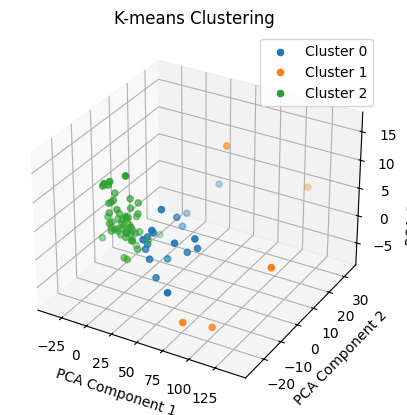

In [66]:
feature_vecs = np.array(feature_vecs)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(feature_vecs)
labels = kmeans.labels_

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(feature_vecs)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], reduced_features[labels == i, 2], label=f'Cluster {i}')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

plt.title('K-means Clustering')
plt.show()